In [45]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [46]:
df=pd.read_csv('Error.csv')

In [47]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [49]:
df

,QId,Library,QPostTypeId,QAcceptedAnswerId,QOwnerUserId,QAnswerCount,QCommentCount,QFavoriteCount,QCommunityOwnedDate,QCreationDate,...,Link,Why,What,How,Other,Category,Tags,ErrorType,Type,Error
0,67493977,react-native,1,0,5078763,1,0,0,0,2021-05-11T20:34:35.273,...,NaN,1,0,0.0,0.0,High,"react-native,material-ui,expo",TypeError:undefined is not an object (evaluati...,TypeError,undefined is not an object (evaluating '_react...
1,54612767,react-native,1,0,6794795,2,0,0,0,2019-02-10T02:19:26.823,...,NaN,1,0,0.0,0.0,Low,"javascript,react-native",TypeError:Cannot read property 'show' of defin...,TypeError,Cannot read property 'show' of defined.</p>
2,61742807,react-native,1,0,4017142,1,1,0,0,2020-05-12T02:35:26.833,...,NaN,0,1,0.0,0.0,Low,react-native,TypeError:Cannot read property 'length' of und...,TypeError,Cannot read property 'length' of undefined
3,58782446,react-native,1,0,11346397,0,11,0,0,2019-11-09T18:47:23.977,...,NaN,0,0,1.0,0.0,Mid,"javascript,firebase,react-native,google-cloud-...",TypeError:undefined is not a function (near '....,TypeError,undefined is not a function (near '...}).catch...
4,73510080,react-native,1,73510203,14533051,1,6,0,0,2022-08-27T10:09:17.017,...,NaN,1,0,0.0,0.0,Low,"react-native,react-native-flatlist",TypeError:undefined is not an object (evaluati...,TypeError,undefined is not an object (evaluating 'reques...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,45414040,webpack,1,0,1162084,0,2,0,0,2017-07-31T10:58:22.970,...,https://stackoverflow.com/questions/45414040,0,0,0.0,1.0,Mid,"javascript,npm,webpack,webpack-2","Uncaught Error:Cannot find module ""run""",Uncaught Error,"Cannot find module ""run"""
1926,66948627,typescript,1,0,14634210,0,0,0,0,2021-04-05T05:30:52.420,...,https://stackoverflow.com/questions/66948627,0,0,1.0,0.0,Mid,"javascript,node.js,typescript,webassembly",Uncaught Error:Cannot find module './libs/tess...,Uncaught Error,Cannot find module './libs/tesseract-core'
1927,51991299,angular,1,51992234,0,4,6,0,0,2018-08-23T17:29:22.103,...,https://stackoverflow.com/questions/51991299,0,0,1.0,0.0,Low,"javascript,node.js,angular,npm,angular6",Uncaught Error:Unexpected module 'SidebarModul...,Uncaught Error,Unexpected module 'SidebarModule' declared by ...
1928,47675757,angular,1,47676862,4332851,2,2,0,0,2017-12-06T13:41:04.717,...,https://stackoverflow.com/questions/47675757,0,1,0.0,0.0,High,angular,Uncaught Error:Can't resolve all parameters fo...,Uncaught Error,Can't resolve all parameters for JwtIntercepto...


# Pie and Bar Chart of 6 Top Most Error Type

C:\Users\akidu\AppData\Local\Temp\ipykernel_1820\3968586817.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdBu')


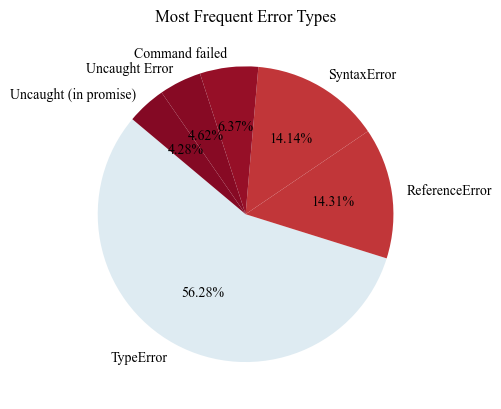

In [71]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
error_counts = df['Type'].value_counts().head(6)
cmap = cm.get_cmap('RdBu') 
normalized_data = error_counts / sum(error_counts)
plt.pie(error_counts, labels=error_counts.index, colors=cmap(normalized_data),autopct='%1.2f%%', startangle=140,textprops={'color': 'black'})

plt.title('Most Frequent Error Types')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 10
plt.show()

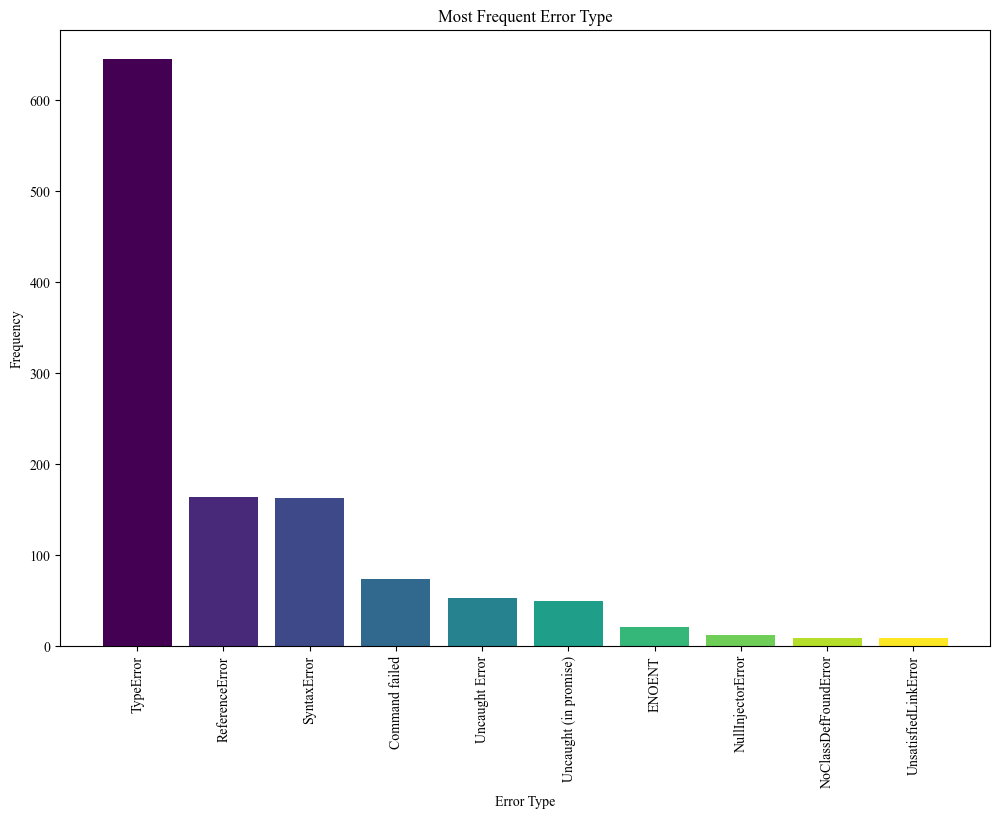

In [72]:
import matplotlib.cm as cm

colors = cm.viridis(np.linspace(0, 1, 10))
library_data = df['Type'].value_counts().head(10)


plt.figure(figsize=(12, 8))
plt.bar(library_data.index, library_data.values,color=colors)
plt.xlabel('Error Type')
plt.ylabel('Frequency')
plt.title('Most Frequent Error Type')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.xticks(rotation=90)
plt.show()

# Counter Plot of Error type

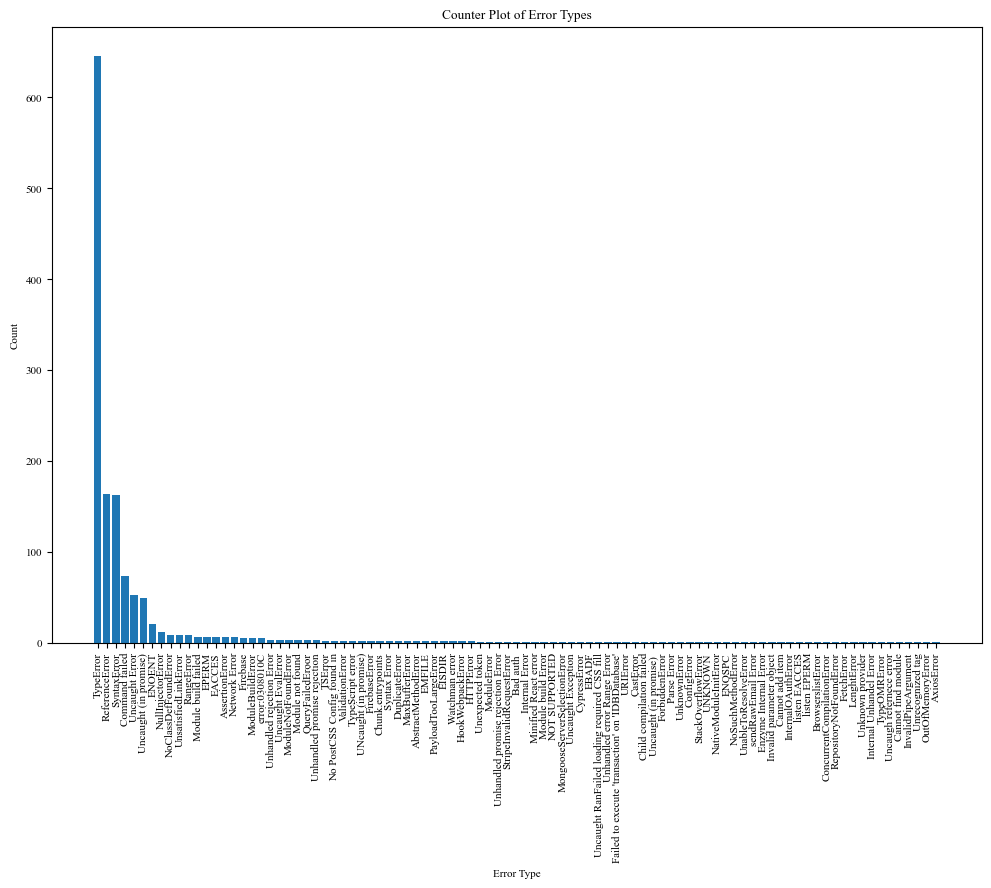

In [61]:
library_data = df['Type'].value_counts()


plt.figure(figsize=(12, 8))
plt.bar(library_data.index, library_data.values)
plt.xlabel('Error Type')
plt.ylabel('Count')
plt.title('Counter Plot of Error Types')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 8
plt.xticks(rotation=90)
plt.show()

In [73]:
Angular=df[df['Library']=='angular']

# Angular  

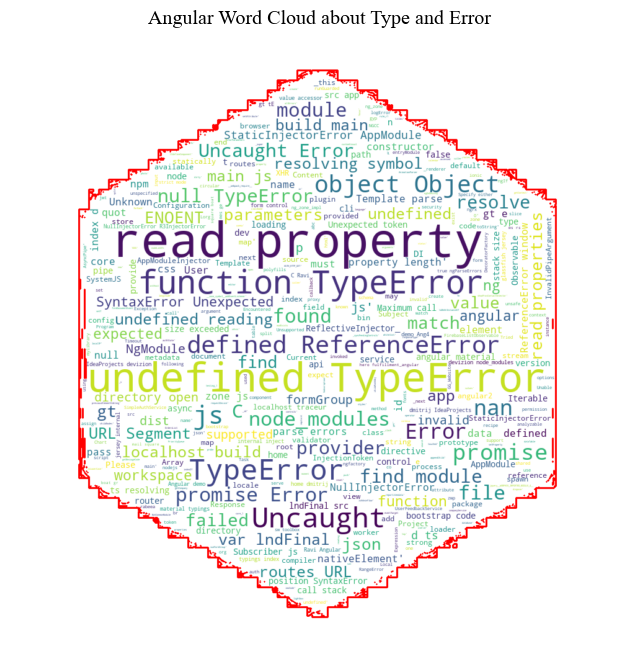

In [76]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in Angular['ErrorType'].tolist()]
text = ' '.join(question_titles)
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap='viridis',background_color='white',mask=nodemask,contour_color="red",contour_width=3,min_font_size=3,max_words=400).generate(text)
# wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Angular Word Cloud about Type and Error')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

# Angular with only Error

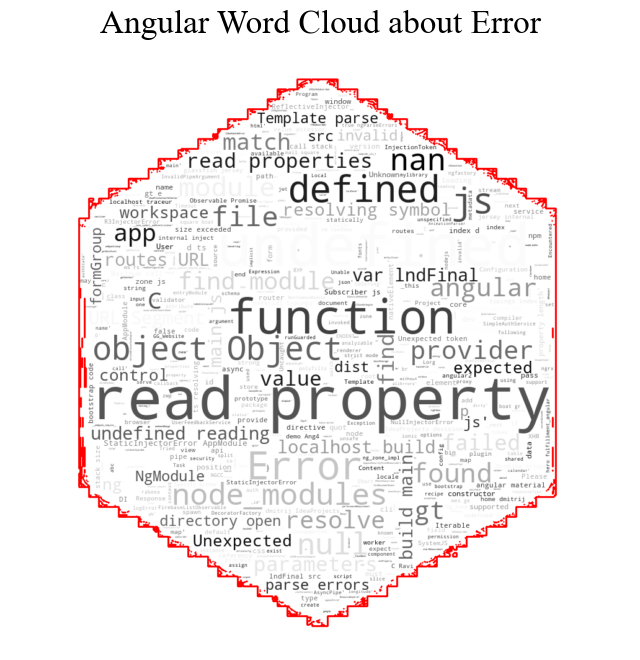

In [75]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in Angular['Error'].tolist()]
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap = 'binary', background_color='white',mask=nodemask,contour_color="red",contour_width=3.0,min_font_size=3,max_words=500).generate(text)
# wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Angular Word Cloud about Error')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

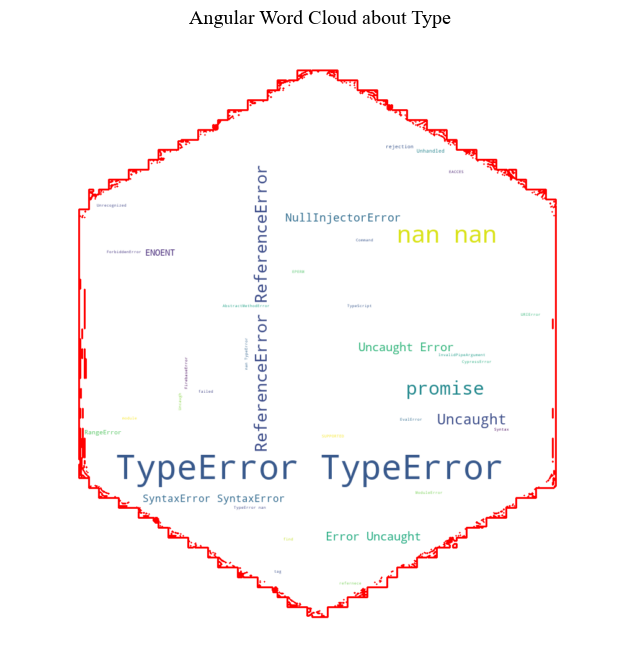

In [78]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in Angular['Type'].tolist()]
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap = 'viridis', background_color='white',mask=nodemask,contour_color="red",contour_width=3,min_font_size=3,max_words=500).generate(text)
# wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Angular Word Cloud about Type')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

# Webpack 

In [79]:
webpack=df[df['Library']=='webpack']

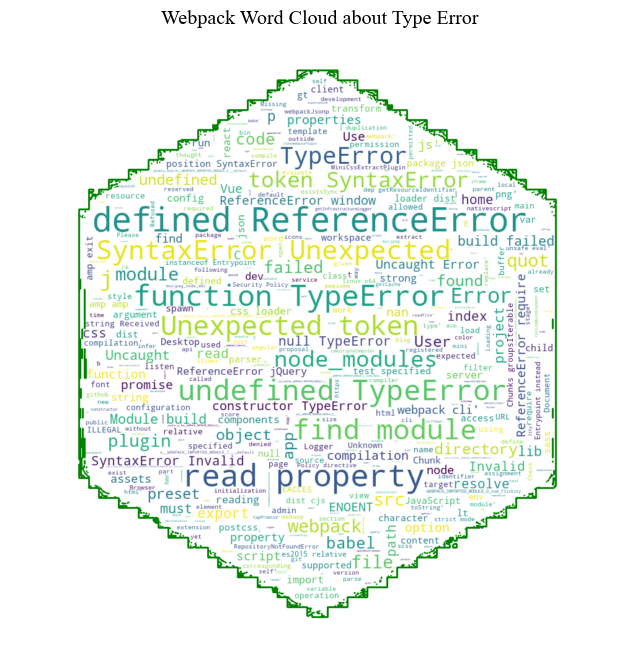

In [80]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in webpack['ErrorType'].tolist()]
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap = 'viridis', background_color='white',mask=nodemask,contour_color="green",contour_width=3,min_font_size=3,max_words=400).generate(text)
# wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Webpack Word Cloud about Type Error')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

# Webpack with only Error

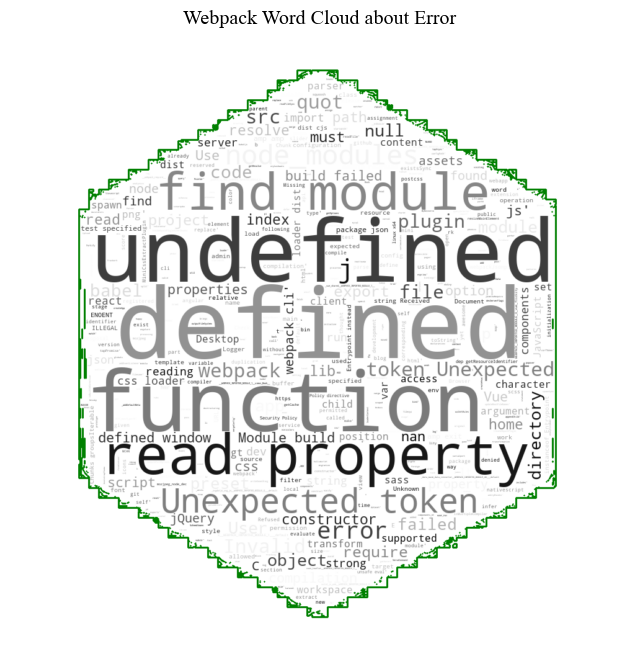

In [81]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in webpack['Error'].tolist()]
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap = 'binary', background_color='white',mask=nodemask,contour_color="green",contour_width=3,min_font_size=3,max_words=500).generate(text)
# wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Webpack Word Cloud about Error')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

# Typescript 

In [82]:
Typescript=df[df['Library']=='typescript']

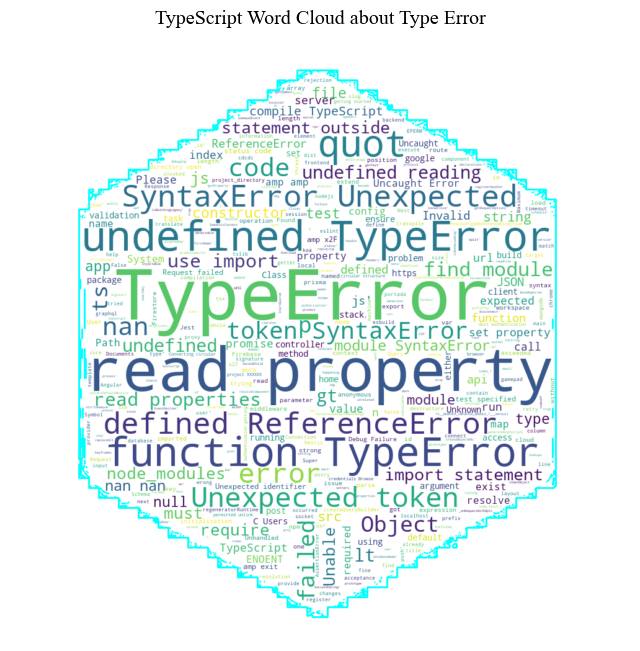

In [83]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in Typescript['ErrorType'].tolist()]
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap = 'viridis', background_color='white',mask=nodemask,contour_color="cyan",contour_width=3,min_font_size=3,max_words=400).generate(text)
# wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('TypeScript Word Cloud about Type Error')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

# Type script word cloud about error

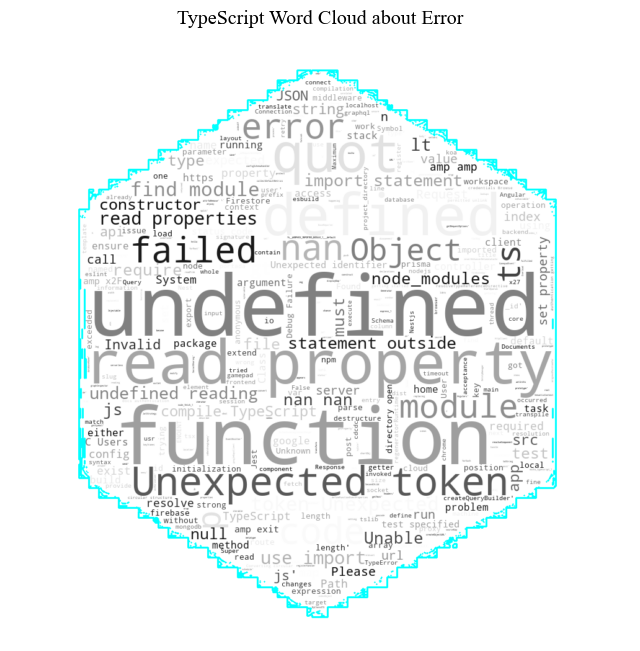

In [84]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in Typescript['Error'].tolist()]
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap = 'binary', background_color='white',mask=nodemask,contour_color="cyan",contour_width=3,min_font_size=3,max_words=400).generate(text)
# wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('TypeScript Word Cloud about Error')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

# React Native


In [85]:
react_native=df[df['Library']=='react-native']

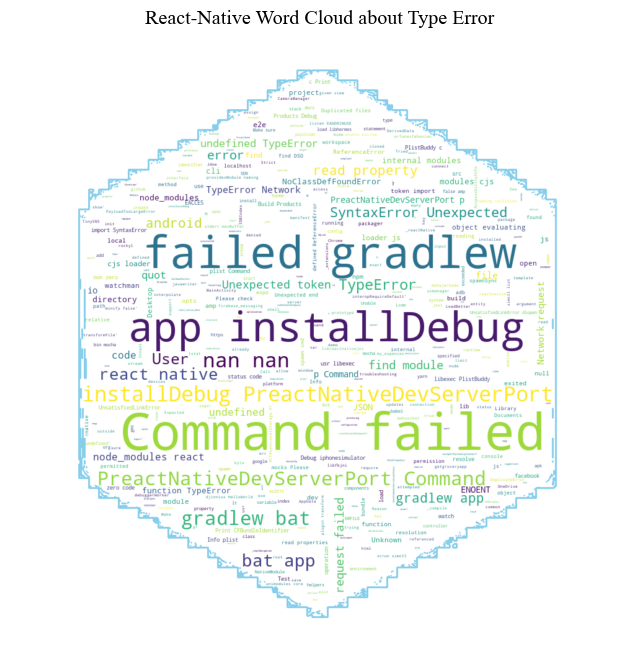

In [86]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in react_native['ErrorType'].tolist()]
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap = 'viridis', background_color='white',mask=nodemask,contour_color="skyblue",contour_width=3,min_font_size=3,max_words=400).generate(text)
# wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('React-Native Word Cloud about Type Error')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

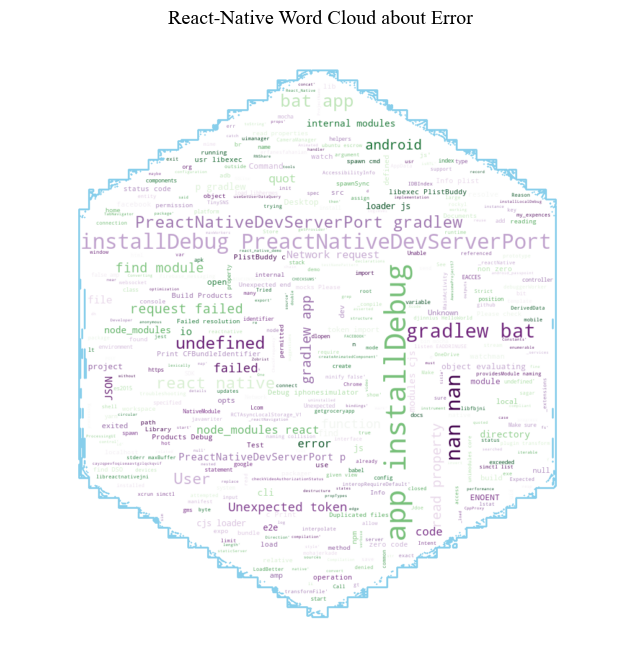

In [91]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in react_native['Error'].tolist()]
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap = 'PRGn_r', background_color='white',mask=nodemask,contour_color="skyblue",contour_width=3,min_font_size=3,max_words=400).generate(text)
# wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('React-Native Word Cloud about Error')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

#  React Js

In [88]:
reactjs=df[df['Library']=='reactjs']

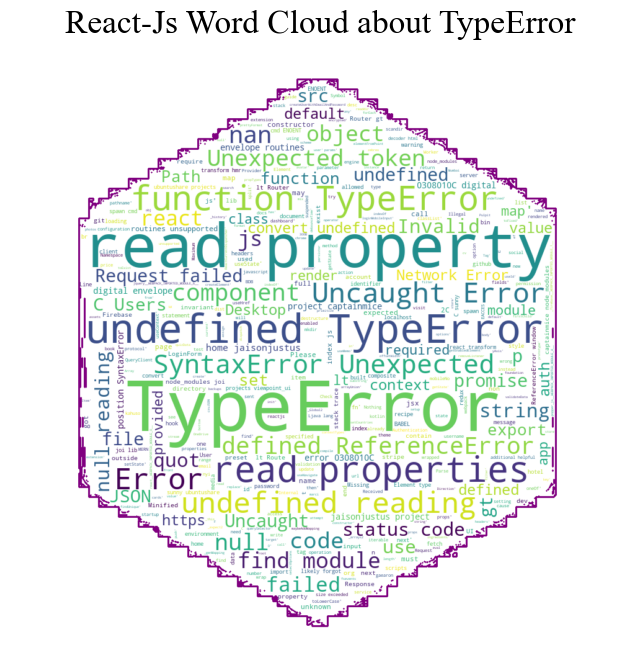

In [89]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in reactjs['ErrorType'].tolist()]
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap = 'viridis', background_color='white',mask=nodemask,contour_color="purple",contour_width=3,min_font_size=3,max_words=400).generate(text)
# wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('React-Js Word Cloud about TypeError')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()

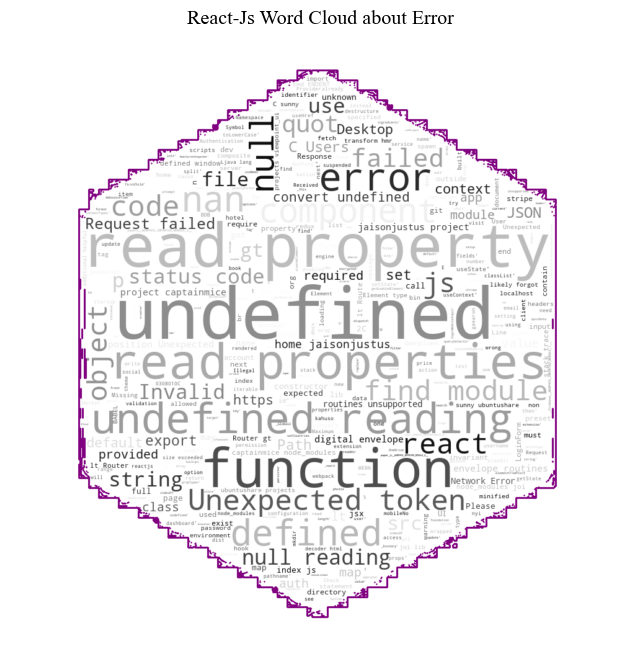

In [90]:
nodemask = np.array(Image.open('nodefiz.jpg'))  
colormap=ImageColorGenerator(nodemask)
question_titles = [str(title) for title in reactjs['Error'].tolist()]
text = ' '.join(question_titles)

wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS,colormap = 'binary', background_color='white',mask=nodemask,contour_color="purple",contour_width=3,min_font_size=3,max_words=400).generate(text)
# wordcloud.recolor(color_func=colormap)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('React-Js Word Cloud about Error')
plt.axis('off')
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.size'] = 12
plt.show()